In [97]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from pathlib import Path
from typing import List
from typing import Any
import json
import os
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_squared_error

import helper

/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:163: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:184: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [113]:
rules=[22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]

num_cells = 22
dev_steps = 22
try_seedints = [69904,149796]

ones_1=[]
ones_2=[]
perc_overlaps=[]
overlap_ones = []
for rule in rules:
    all_targs=[]
    for s in try_seedints:
        start_pattern = helper.seedID2string(s, num_cells)
        targets = helper.rule2targets_wrapped_wstart(rule, L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
        all_targs.append(targets)

    ones_1.append(sum(all_targs[0]).sum()/(22*23))
    ones_2.append(sum(all_targs[1]).sum()/(22*23))
    #diff1s = abs(env11s-env21s)

    where_overlap = np.where(all_targs[0]==all_targs[1])
    perc_overlaps.append(len(all_targs[0][where_overlap])/(22*23))
    overlap_ones.append(sum(all_targs[0][where_overlap])/len(all_targs[0][where_overlap])) #percent 1s



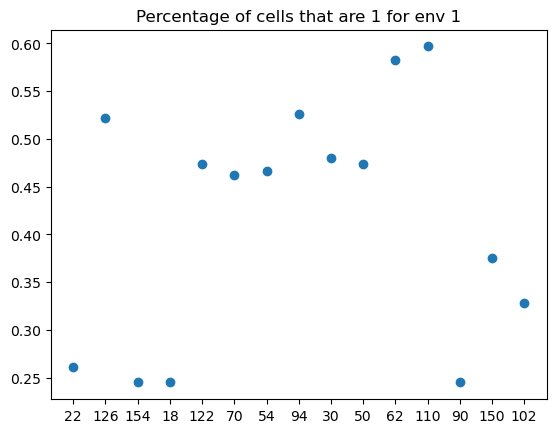

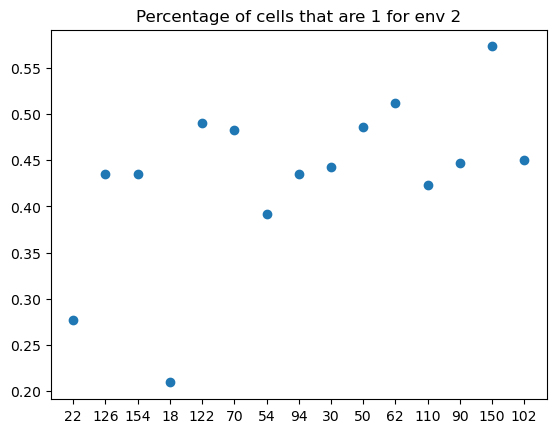

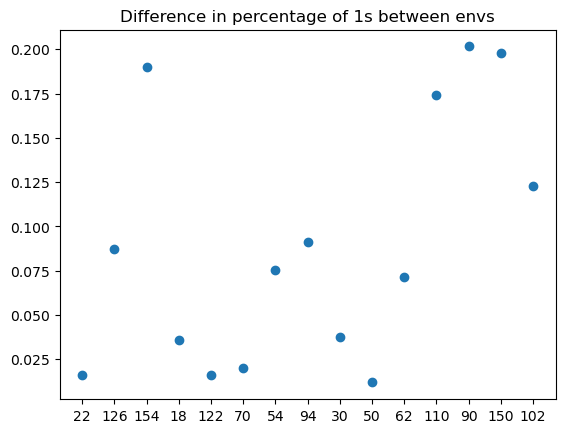

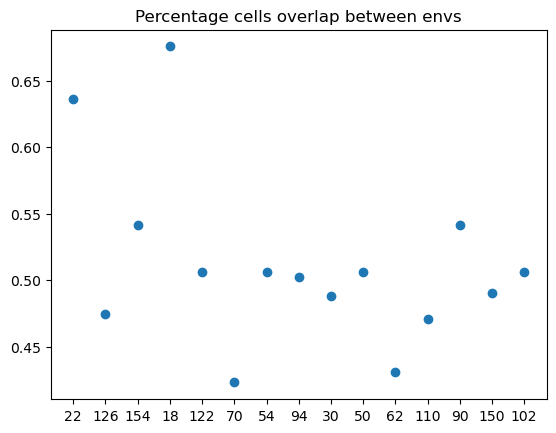

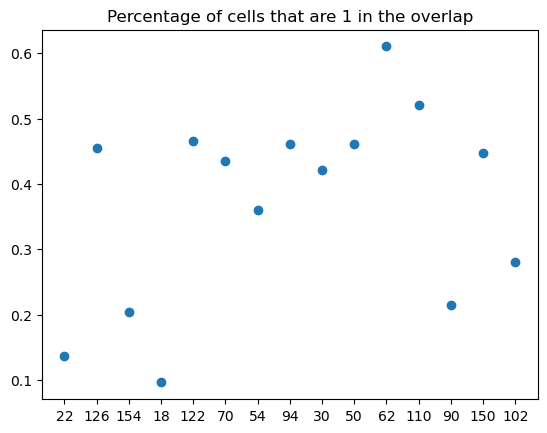

In [123]:
plt.scatter(list(range(len(rules))),ones_1)
plt.xticks(ticks=range(0, len(rules)), labels=rules)
plt.title("Percentage of cells that are 1 for env 1")
plt.show()

plt.scatter(list(range(len(rules))),ones_2)
plt.xticks(ticks=range(0, len(rules)), labels=rules)
plt.title("Percentage of cells that are 1 for env 2")
plt.show()

plt.scatter(list(range(len(rules))),abs(np.array(ones_2)-np.array(ones_1)))
plt.xticks(ticks=range(0, len(rules)), labels=rules)
plt.title("Difference in percentage of 1s between envs")
plt.show()

plt.scatter(list(range(len(rules))),perc_overlaps)
plt.xticks(ticks=range(0, len(rules)), labels=rules)
plt.title("Percentage cells overlap between envs")
plt.show()

plt.scatter(list(range(len(rules))),overlap_ones)
plt.xticks(ticks=range(0, len(rules)), labels=rules)
plt.title("Percentage of cells that are 1 in the overlap")
plt.show()

In [3]:
def custom_legend(ax, title, n=5):
    """
    Reduce the number of entries in the Legend,
    by only showing first,last and every n-th
    """
    handles, labels = ax.get_legend_handles_labels()
    if len(handles) <= n + 2:
        return ax.legend(title=title)
    new_handles = [handles[0]] + handles[1:-1:n] + [handles[-1]]
    new_labels = [labels[0]] + labels[1:-1:n] + [labels[-1]]
    return ax.legend(new_handles, new_labels, title=title)


class JSONLogger:
    def __init__(self, filepath: str):
        self.filepath = Path(filepath)
        self.filepath.parent.mkdir(parents=True, exist_ok=True)

    def append(self, results: Any) -> None:
        with self.filepath.open("a") as f:
            f.write(json.dumps(results) + "\n")

    def read(self) -> list:
        results = []
        with open(self.filepath) as f:
            results = [json.loads(line) for line in f]
        return results

In [93]:
root="~/scratch/detailed_save/"
exp_type = "static"
candidate_idx = -1

M = 0.3
N = 20
sigma = 1000  # Smoothing parameter, adjust as needed

In [94]:
rules=[22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
diff0s=[]
diff50s=[]
smooths=[]
for r in rules:
    filename = os.path.expanduser(f"{root}/noise_results/stats_{r}_{exp_type}_{candidate_idx}_noise_data.jsonl")
    #filename = os.path.expanduser(f"{root}/noise_results/stats_{r}_randomGRN_noise_data.jsonl")
    log = JSONLogger(filename)
    diff0=[]
    diff50=[]
    rmses=[]
    all_data = log.read()
    for exp in all_data:
        if "69904" in Path(exp["file"]).name:
            data = exp["data"]
            for i, (fitnesses, noise) in enumerate(zip(data, np.linspace(0, M, N))):
                #y_smoothed = gaussian_filter1d(fitnesses, sigma=sigma)
                #rmse = np.sqrt(mean_squared_error(fitnesses, y_smoothed)) # Calculate RMSE between the original and smoothed line
                #print(rmse)
                if noise == 0:
                    base_fit = fitnesses[0]
                if i == 4:
                    print(noise)
                    mean_noise = sum(fitnesses)/len(fitnesses) #np.std(np.abs(np.array(fitnesses)[1:] - np.array(fitnesses)[:-1]))
                    rmse = base_fit - mean_noise
                    rmses.append(rmse)
                if noise == 0.3:
                    high_noise_fit = fitnesses[0]
                    diff0.append(base_fit - high_noise_fit)
                    high_noise_fit = fitnesses[int(len(fitnesses)/2)]
                    diff50.append(base_fit - high_noise_fit)
    diff0s.append(diff0)
    diff50s.append(diff50)
    smooths.append(rmses)
    #print(np.array(rmses).shape)
    #smooths.append(np.array(rmses).mean(axis=0))

0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211
0.06315789473684211


In [95]:
#vari_smooths = smooths.copy()
static_smooths = smooths.copy()

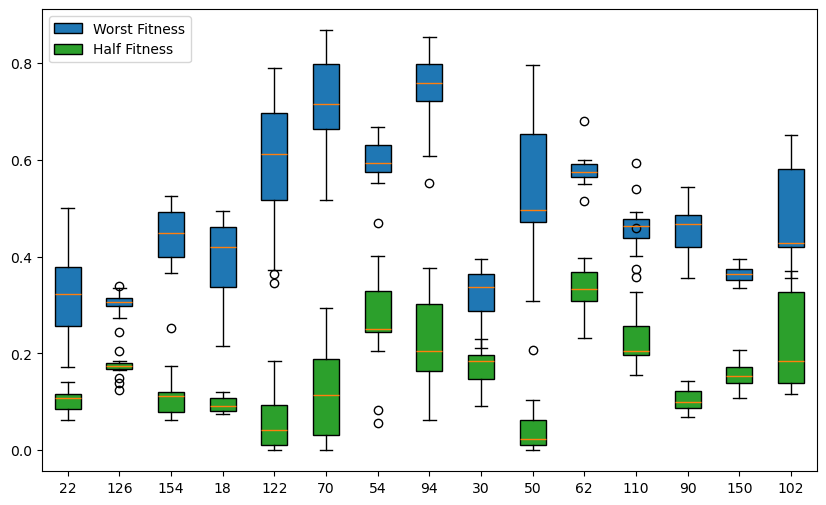

In [57]:
# Create the plot
plt.figure(figsize=(10, 6))

box1=plt.boxplot(diff0s, patch_artist=True)
for patch in box1['boxes']:
    patch.set_facecolor("C0")
box2=plt.boxplot(diff50s, patch_artist=True)
for patch in box2['boxes']:
    patch.set_facecolor("C2")

plt.legend([box1["boxes"][0], box2["boxes"][0]], ["Worst Fitness", "Half Fitness"], loc="upper left")
plt.xticks(ticks=range(1, len(rules) + 1), labels=rules)
plt.show()

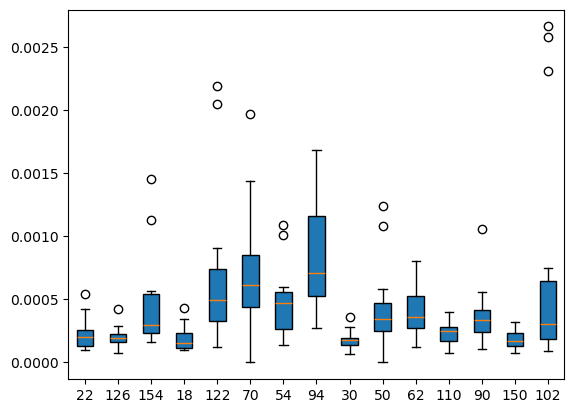

In [58]:
#for idx, s in enumerate(smooths):
    #plt.plot(s[1:],label=rules[idx])
#plt.legend(loc="right")
#plt.show()
plt.boxplot(smooths, patch_artist=True)
plt.xticks(ticks=range(1, len(rules) + 1), labels=rules)

plt.show()

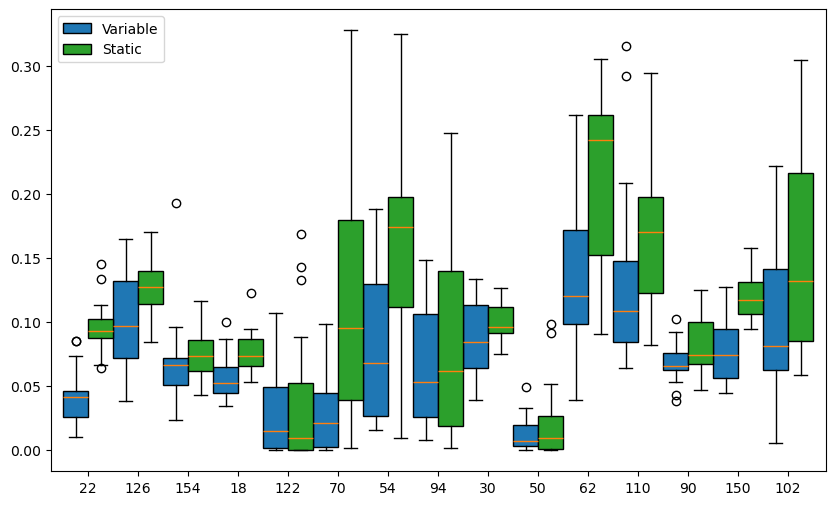

In [96]:
# Create the plot
plt.figure(figsize=(10, 6))

positions1 = np.arange(1, len(vari_smooths) + 1) - 0.25  # Shift left for the first set
positions2 = np.arange(1, len(static_smooths) + 1) + 0.25  # Shift right for the second set

box1=plt.boxplot(vari_smooths, positions=positions1, patch_artist=True)
for patch in box1['boxes']:
    patch.set_facecolor("C0")
box2=plt.boxplot(static_smooths, positions=positions2, patch_artist=True)
for patch in box2['boxes']:
    patch.set_facecolor("C2")

plt.legend([box1["boxes"][0], box2["boxes"][0]], ["Variable", "Static"], loc="upper left")
plt.xticks(ticks=range(1, len(rules) + 1), labels=rules)
plt.show()

In [39]:
#22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102
rule = 54
exp_type = "variable"
filename = os.path.expanduser(f"{root}/noise_results/stats_{rule}_{exp_type}_{candidate_idx}_noise_data.jsonl")
#filename = os.path.expanduser(f"{root}/noise_results/stats_{rule}_randomGRN_noise_data.jsonl")
log = JSONLogger(filename)

In [ ]:
from matplotlib.patches import Rectangle

exp_type = "static"

for r in rules:
    filename = os.path.expanduser(f"{root}/noise_results/stats_{r}_{exp_type}_{candidate_idx}_noise_data.jsonl")
    #filename = os.path.expanduser(f"{root}/noise_results/stats_{rule}_randomGRN_noise_data.jsonl")
    log = JSONLogger(filename)

    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),sharex=True, sharey=True)
    axes = axes.flatten()

    all_data = log.read()
    c=0
    for idx, exp in enumerate(all_data):
        max_fit = 0
        if "69904" in Path(exp["file"]).name:
            data = exp["data"]
            for i, (fitnesses, noise) in enumerate(zip(data, np.linspace(0, M, N))):
                axes[c].plot(fitnesses, color=viridis((i + 1) / N), label=f"{noise:.3f}")
                if max(fitnesses) > max_fit:
                    max_fit = max(fitnesses)
            if max_fit > 0.98:
                rect = Rectangle((0, 0), 1, 1, transform=axes[c].transAxes,
                            color='red', linewidth=5, fill=False)
                axes[c].add_patch(rect)
            c+=1
            
    plt.ylim(0.2,1)
    fig.suptitle(f"Rule: {r}, Exp type: {exp_type}", fontsize=16)
    plt.show()

In [ ]:
all_data = log.read()
for idx, exp in enumerate(all_data):
    data = exp["data"]
    name = Path(exp["file"]).name
    fig, ax = plt.subplots()
    rs=[]
    for i, (fitnesses, noise) in enumerate(zip(data, np.linspace(0, M, N))):
        ax.plot(fitnesses, color=viridis((i + 1) / N), label=f"{noise:.3f}")
        rmse = np.std(np.abs(np.array(fitnesses)[1:] - np.array(fitnesses)[:-1]))
        rs.append(rmse)

    # plt.axhline(fitnesses[0], color="red", lw=0.5)
    ax.set_ylim(0, 1.1)
    plt.grid()
    plt.ylim(0, 1.1)
    plt.ylabel("Fitness")
    plt.xlabel("Samples sorted by Fitness")
    plt.legend()
    #custom_legend(ax, title="Noise scale:", n=3)
    plt.title(name)
    plt.tight_layout()
    # plt.savefig("plots/" + name + ".fitnesses.png", dpi=300)
    # plt.close()
    plt.show()

    fig, ax = plt.subplots()
    for i, fitnesses in enumerate(data):
        # label=f"{np.linspace(0,M,N)[i]:.3f}"
        ax.plot(np.array(fitnesses) - i / 80, color=viridis((i + 1) / N))
    # ax.annotate(
    #     "different levels of noise\n(displaced for visibility)",
    #     xy=(2300, 0.75),
    #     xytext=(1500, 0.3),
    #     arrowprops=dict(fc="gray", ec="None", shrink=0.01),
    # )
    plt.grid()
    plt.yticks([])
    plt.xticks([])
    plt.ylabel("Fitness")
    plt.xlabel("Samples sorted by Fitness")
    # plt.legend()
    plt.title(name)
    plt.tight_layout()
    # plt.savefig("plots/" + name + ".stagger.png", dpi=300)
    # plt.close()
    plt.show()

    plt.plot(rs)
    plt.show()